<a href="https://colab.research.google.com/github/Swathi12499/DataAnalytics/blob/master/TryNaiveBayesLab10_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Use label_binarize to be multi-label like settings

# load the iris datasets
dataset = datasets.load_iris()
X=dataset.data
y=dataset.target
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]
classifier = OneVsRestClassifier(GaussianNB())
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [0]:

# fit a Naive Bayes model to the data
#model = GaussianNB()
classifier.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = classifier.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print("CONFUSION MATRIX")
#print(metrics.confusion_matrix(expected, predicted))
print("Accuracy:")
print(metrics.accuracy_score(y_test,predicted))
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.93      0.90        15
           2       0.85      1.00      0.92        11

   micro avg       0.92      0.98      0.95        45
   macro avg       0.91      0.98      0.94        45
weighted avg       0.92      0.98      0.95        45
 samples avg       0.93      0.98      0.95        45

Accuracy:
0.8888888888888888


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                       predicted[:, i])
    average_precision[i] = average_precision_score(y_test[:, i],  predicted[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predicted.ravel())
average_precision["micro"] = average_precision_score(y_test, predicted,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.90


NameError: ignored

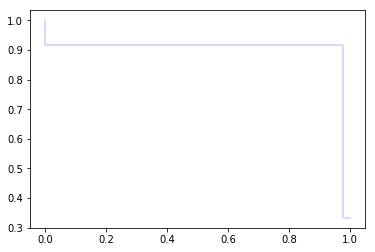

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))